### Question1

In [1]:
# necessary imports
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialisating degrees of freedom
k = 3

In [3]:
# function to calculate t-distribution for different sample with a variable size = 100000
def t_distribution(n, size = 100000):
    seed =9
    t_dist = stats.t.rvs(df=k, size =(size,n), random_state = seed)   
    return t_dist

In [4]:
# function to calculate standrad deviation from given variance formulae
def standard_dev(k,n):
    variance_clt = k/((k-2)*n)
    sd_clt = np.sqrt(variance_clt)   
    return sd_clt

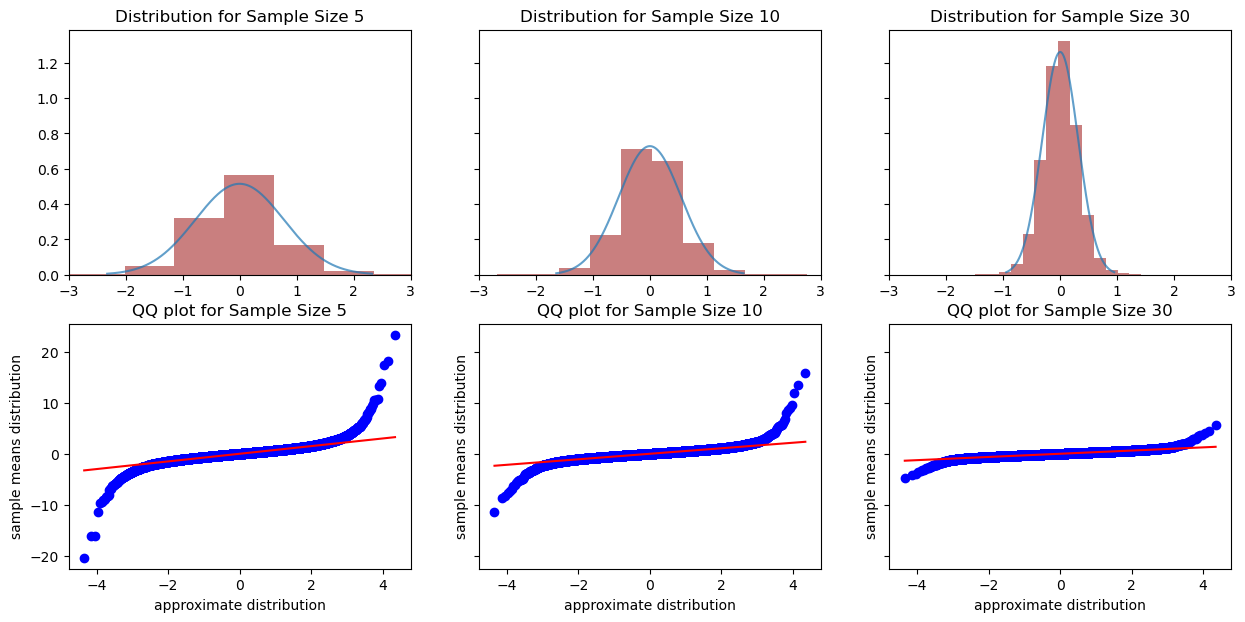

In [5]:
# 1.a) Created a 2-by-3 array of subplots
figure,axis = plt.subplots(nrows =2, ncols=3, figsize = (15,7), sharey = 'row')
# given array N of sample size
N = [5,10,30]

#1.b) for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
for index,n in enumerate(N):
    
    #1.c) sample average along each row (i.e. size sample averages) and their histogram in a subplot
    sample_avg = np.mean(t_distribution(n),axis=1)
    axis[0,index].hist(sample_avg, bins = 50, alpha = 0.6, density =True,color = 'brown')
    
    # mean and standrad deviation calculation using custom function
    mean_clt = 0
    sd_clt = standard_dev(k,n)
    # 100000 sample values for x-axis assumed in the quantile range of normal distribution
    x_values = np.linspace(mean_clt-3*sd_clt,mean_clt+3*sd_clt, 100000)
    
    #1.d) the approximate density of the distribution of sample averages using CLT
    clt_dist = stats.norm.pdf(x_values, mean_clt, sd_clt)
    axis[0,index].plot(x_values, clt_dist, alpha = 0.7)
    axis[0,index].set_title('Distribution for Sample Size {n}'.format(n=n))
    # limiting x range of plot for better observation
    axis[0, index].set_xlim([-3, 3])
    
    #1.e) the QQ plot of the sample means versus their approximate distribution
    stats.probplot(sample_avg, dist='norm', plot = axis[1,index])
    axis[1,index].set_title('QQ plot for Sample Size {n}'.format(n=n))
    axis[1,index].set_xlabel('approximate distribution')
    axis[1,index].set_ylabel('sample means distribution')
    
plt.show()

As observed from the plots for N = 30, the approximate density of ***independent, identically distributed sample means*** given by the CLT is a good approximation of the actual distribution. Following are the reasons:
1. As disscussed in the lectures , Central Limit Theorem provides a better approximation of the actual distribution including the mean and standard deviation if the **sample size is large**, clearly represented by N=30.Also, the resultant plot approximates to normal distribution regardless of the original distribution of the variables.
2. As observed from the QQ-plot, as the sample size increase from N=5 to N=30, the **skewness is reducing** as the **outliers of the actual distribution (sample means) are getting removed** and the **plot is more aligned along the diagonal(theoretical distribution)**.

### Question 2

In [6]:
# necessary import
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

***error can occur if module pandas_datareader is not installed***

In [7]:
# necessary imports and Dow Jones Industrial Average data import
import pandas_datareader.data as web
data = web.DataReader ('^DJI', 'stooq', start = '1995/01/01', end= '2023/11/14' )
data = data.reset_index ( )
dates = data["Date"]
dow = data["Close"].to_numpy( )

***2a*** \
time series plot

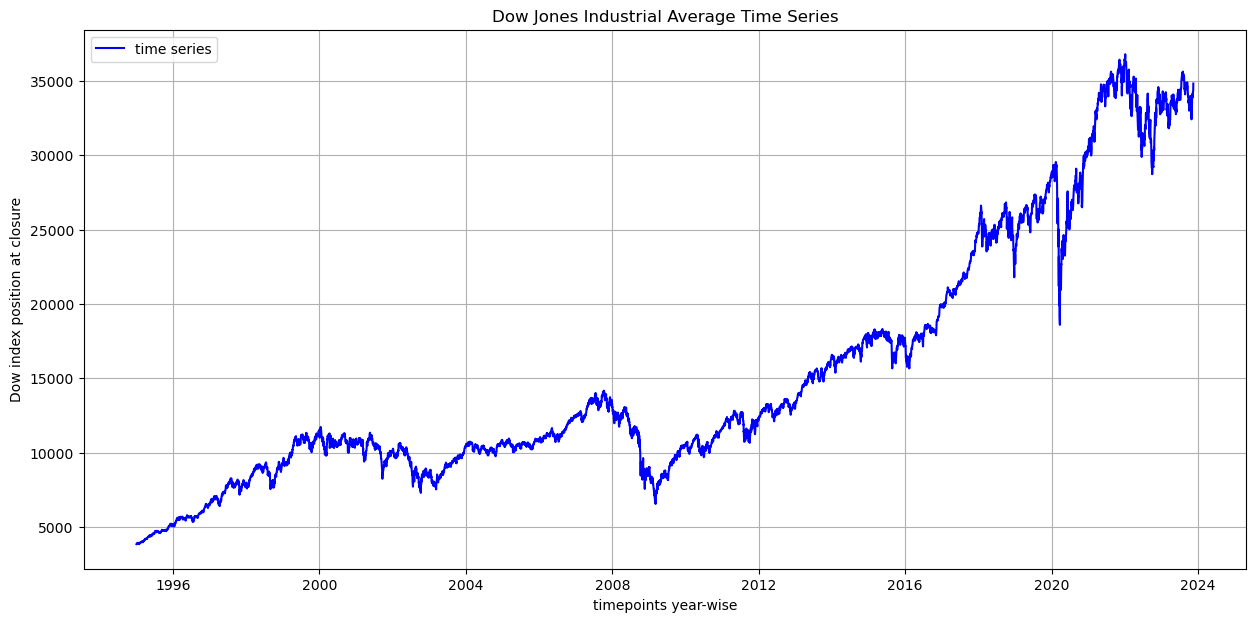

In [8]:
plt.figure(figsize=(15,7))
plt.plot(dates,dow, c ='b', label = 'time series')
plt.xlabel('timepoints year-wise')
plt.ylabel('Dow index position at closure')
plt.title('Dow Jones Industrial Average Time Series')
plt.legend()
plt.grid(True)
plt.show()

***2b***

calculated percentage daily returns using the formula $Return_t = 100 \times \frac{{\text{Close t}}}{{\text{Close t}_{-1} - 1}}$


In [9]:
# percentage daily returns calculation using the formula
daily_returns = [100*((dow[t]/dow[t-1])-1) for t in range(1, len(dow))]

# added '0' at index 0 of column daily_returns to avoid index mismatch
data['daily_returns'] = [0] + daily_returns

***2c*** \
the length-n sample averages of daily returns for every n ≥ 100 (up to the length of the dataset)

In [10]:
nsample_averages = [data['daily_returns'][:n].mean() for n in range(100,len(data))]

calculating the quantile range around actual mean of sample averages

In [11]:
q_25 = np.percentile(nsample_averages,25)
q_75 = np.percentile(nsample_averages,75)

Plot of the timeseries with modified samples

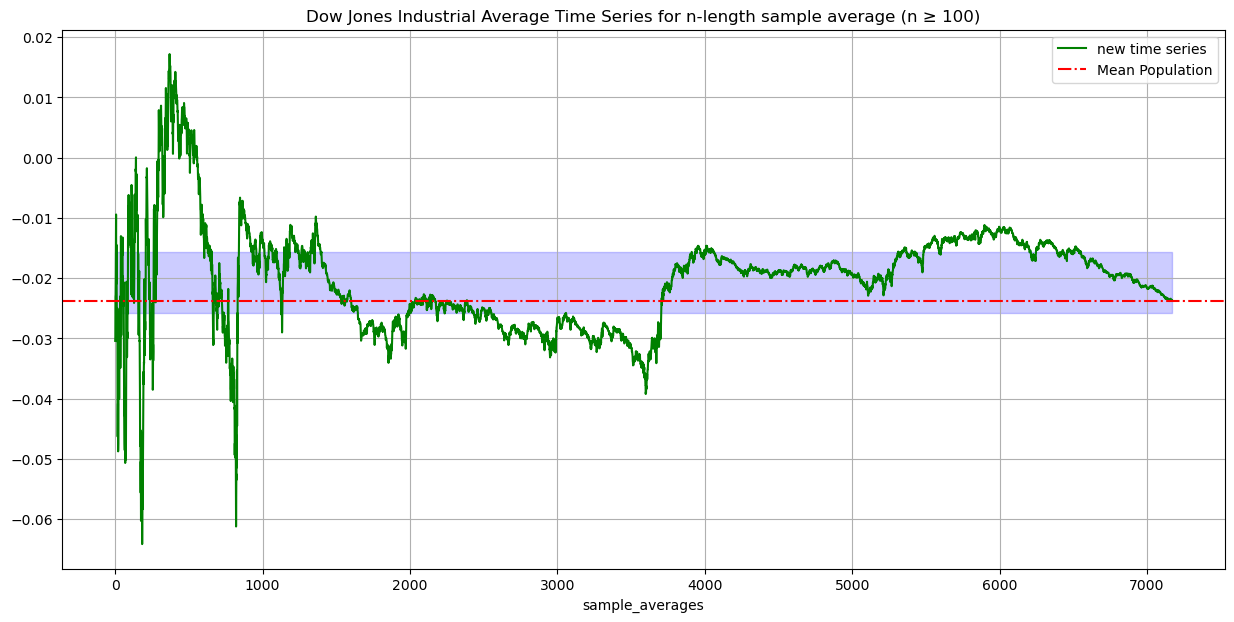

In [12]:
plt.figure(figsize=(15,7))
plt.plot(nsample_averages,c ='g', label = 'new time series')

# plotting the actual mean line
plt.axhline(np.mean(data['daily_returns']), color='red',ls ='-.', label='Mean Population')
# plotting the quantile range around actual mean
plt.fill_between([0,len(nsample_averages)], q_25, q_75, color ='b', alpha =0.2)

plt.xlabel('sample_averages')
plt.title('Dow Jones Industrial Average Time Series for n-length sample average (n ≥ 100)')
plt.legend()
plt.grid(True)
plt.show()

As observed from the plot, it is very clear that as the **number of sample (sample average means) is increasing the graph converges to the actual average_sample mean** and remains within the **quantile range of the actual mean**.Thus obeying the **weak Law of Large Numbers** which states that the **PDF converges to what it is meant to estimate (mean in this case)** given by equation-
$$\lim_{{n \to \infty}} \ Pn \left( | \hat{\theta} - \theta | < \epsilon \right) = 1$$

***2d*** \
the length-100 rolling average samples of daily returns

In [13]:
rolling_averages_100 = data['daily_returns'].rolling(window = 100).mean()

the length-400 rolling average samples of daily returns

In [14]:
rolling_averages_400 = data['daily_returns'].rolling(window = 400).mean()

histogram of the length-100 and length-400 rolling average samples

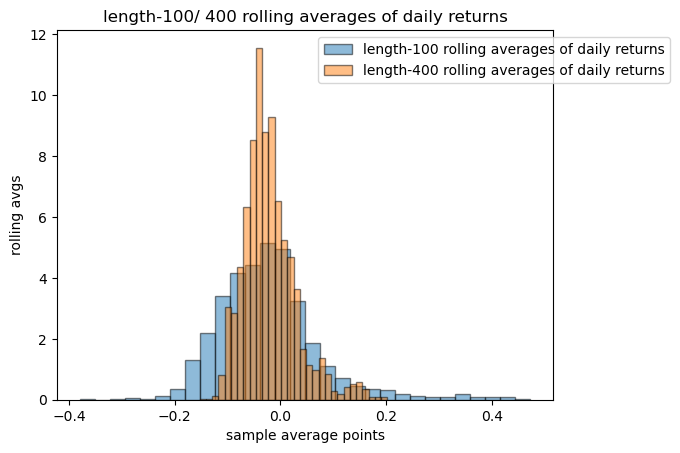

In [15]:
plt.hist(rolling_averages_100, bins=30, edgecolor = 'black', alpha = 0.5, density=True, label = 'length-100 rolling averages of daily returns')
plt.hist(rolling_averages_400, bins=30, alpha = 0.5,edgecolor = 'black', density=True, label = 'length-400 rolling averages of daily returns' )
plt.xlabel('sample average points')
plt.ylabel('rolling avgs')
plt.title('length-100/ 400 rolling averages of daily returns')

# to shift the legends to the right
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25,1))
plt.show()

As observed from the two histogram of the ***independent, identically distributed sample means*** of bin size 100 and 400 as the **bin size increases from 100 to 400 the plot becomes more refined and tends towards a standard normal distribution** thus, aligning with the Central Limit Theorem.

***2e*** \
sample mean, variance, skewness and kurtosis of the daily returns

In [16]:
s_mean = data['daily_returns'].mean()
s_variance = data['daily_returns'].var()
s_skewness = data['daily_returns'].skew()
s_kurtosis = data['daily_returns'].kurtosis()

In [17]:
print ("mean of sample = {} \nvariance of sample = {} \nskew of sample = {} \nkurtosis of sample = {}; ".format(s_mean, s_variance, s_skewness, s_kurtosis))


mean of sample = -0.023719691831171695 
variance of sample = 1.3280670047122127 
skew of sample = 0.6482329250875666 
kurtosis of sample = 12.989762351164483; 


The Kurtosis as observed from the **sample_kurtosis** value is approximately equal to **13** indicating **heavier tail** and a **more steep peak** than the **standard Normal ditribution**, also the distribution is **skewed to the right**. Thus the distribution may represent **Student's t-distribution** if **degrees of freedom value is low**.

***2f***

function which needs to be maximized

In [18]:
def likelihood_log_t(params, data):
    k, mean_, sd = params
    log_t_dist = stats.t.logpdf(data, df = k, loc = mean_, scale = sd)
    return -np.sum(log_t_dist)

parameter(s) which are to be estimated their initial values are used from mean and standrad deviation calculated from 2e and degree of freedom k=2

In [19]:
# assumed degree of freedom
k=2
s_sd = np.sqrt(s_variance)
# initial paramters to be used in minimize function
initial_paramters = (k, s_mean, s_sd)

Calculating the optimal parameters using the minimize function from scipy.optimize using default method 'BFGS' (Broyden-Fletcher-Goldfarb-Shanno) algorithm

In [20]:
opt_result = minimize(likelihood_log_t, initial_paramters, args = (data['daily_returns'],))
# extracting the optimized parameters 
opt_params = opt_result.x

# seperating the values obtained in assigned variables
opt_df = opt_result.x[0]
opt_mean = opt_result.x[1]
opt_sd = opt_result.x[2]

the optimal parameters obtained

In [21]:
print ("optimized degree of freedom obtained using minimize funct = {} \noptimized mean obtained using minimize funct = {} \noptimized stand deviation obtained using minimize funct = {}; ".format(opt_df, opt_mean, opt_sd))


optimized degree of freedom obtained using minimize funct = 2.8526442957500984 
optimized mean obtained using minimize funct = -0.06272450301857048 
optimized stand deviation obtained using minimize funct = 0.6886602476257426; 


plot of the  PDF of the optimal distribution (using minimize function) against the histogram of the daily returns

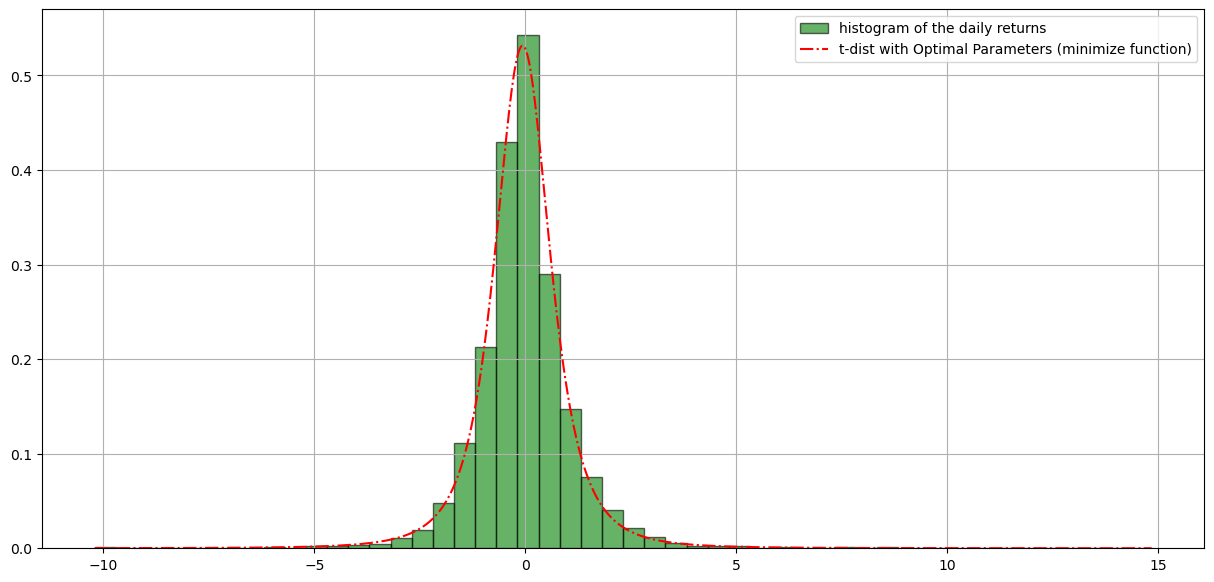

In [22]:
plt.figure(figsize= (15,7))
# histogram of the daily returns
plt.hist(data['daily_returns'], bins=50, alpha=0.6, color='green',density=True, edgecolor='black', label = 'histogram of the daily returns')

# obtaining x-axis samples from range between minimum sample points to maximum sample points
x_values = np.linspace(data['daily_returns'].min(), data['daily_returns'].max(), 1000)
optimisze_pdf = stats.t.pdf(x_values, df = opt_df, loc = opt_mean, scale = opt_sd)


# pdf with optimal parameters
plt.plot(x_values, optimisze_pdf, 'r-.', label='t-dist with Optimal Parameters (minimize function)')

plt.legend()
plt.grid(True)
plt.show()

***2g*** \
generating the optimal parameters using the scipy’s fit function

In [23]:
opt_params_fit = stats.t.fit(data['daily_returns'])
# seperating the values obtained in assigned variables
opt_df_fit, opt_mean_fit,opt_sd_fit = opt_params_fit

comparing the parameters obtain from minimize function from scipy.optimize (opt_params) and parameters obtained from scipy’s fit function (opt_params_fit)

In [24]:
print ("optimized degree of freedom obtained using minimize funct = {} \noptimized mean obtained using minimize funct = {} \noptimized stand deviation obtained using minimize funct = {}; ".format(opt_params[0], opt_params[1], opt_params[2]))


optimized degree of freedom obtained using minimize funct = 2.8526442957500984 
optimized mean obtained using minimize funct = -0.06272450301857048 
optimized stand deviation obtained using minimize funct = 0.6886602476257426; 


In [25]:
print ("optimized degree of freedom obtained using fit funct = {} \noptimized mean obtained using fit funct = {} \noptimized stand deviation obtained using fit funct = {}; ".format(opt_params_fit[0], opt_params_fit[1], opt_params_fit[2]))


optimized degree of freedom obtained using fit funct = 2.852676958611241 
optimized mean obtained using fit funct = -0.06272493712616145 
optimized stand deviation obtained using fit funct = 0.6886641873119856; 


as observed from the above results the optimised paramters obtained using both the function are approximately the same.

plot of the PDF of the optimal distribution (using scipy fit function) against the histogram of the daily returns

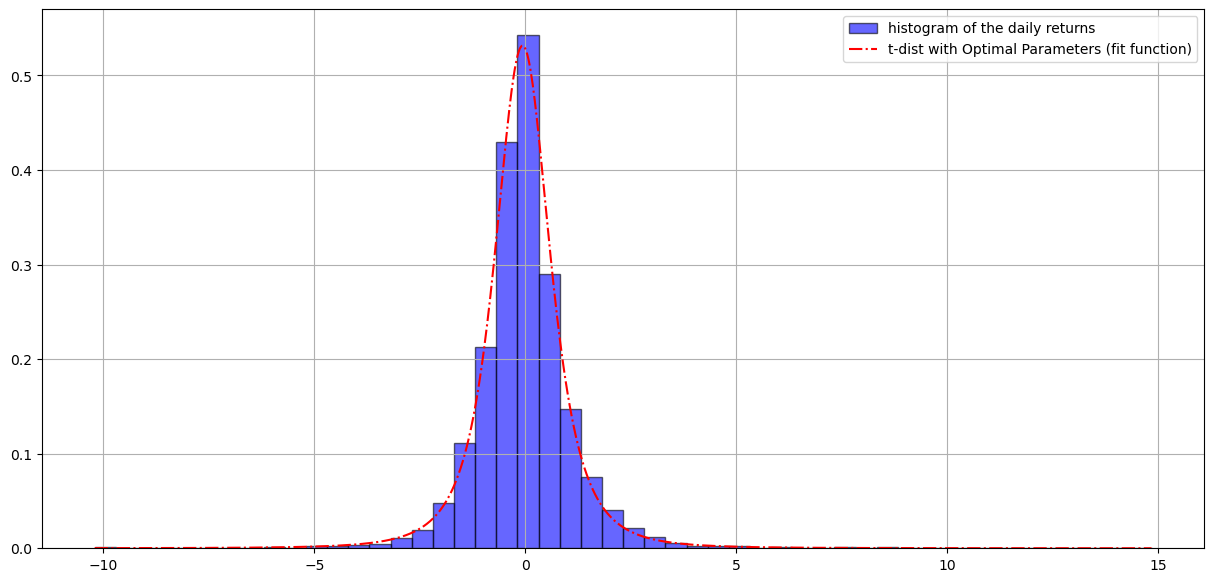

In [26]:
plt.figure(figsize= (15,7))
# histogram of the daily returns
plt.hist(data['daily_returns'], bins=50, alpha=0.6, color='b',density=True, edgecolor='black', label = 'histogram of the daily returns')

# obtaining x-axis samples from range between minimum sample points to maximum sample points
x_values = np.linspace(data['daily_returns'].min(), data['daily_returns'].max(), 1000)
optimisze_pdf = stats.t.pdf(x_values, df = opt_df_fit, loc = opt_mean_fit, scale = opt_sd_fit )

plt.plot(x_values, optimisze_pdf, 'r-.', label='t-dist with Optimal Parameters (fit function)')

plt.legend()
plt.grid(True)
plt.show()